这节课我们需要熟悉两个非常重要的数据分析工具包
* 科学计算工具包：numpy
* 图表绘制工具包：matplotlib
* **还有一个很重要的包，我们会在正课中再讲 → 数据分析工具包：pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 导入模块

1、numpy基础数据结构 → numpy数组是一个多维数组对象，称为ndarray。其由两部分组成：
* 实际的数据
* 描述这些数据的元数据

In [2]:
ar = np.array([1,2,3,4,5,6,7])
print(ar)          # 输出数组，注意数组的格式：中括号，元素之间没有逗号（和列表区分）
print(ar.ndim)     # 输出数组维度的个数（轴数），或者说“秩”，维度的数量也称rank
print(ar.shape)    # 数组的维度，对于n行m列的数组，shape为（n，m）
print(ar.size)     # 数组的元素总数，对于n行m列的数组，元素总数为n*m
print(ar.dtype)    # 数组中元素的类型，类似type()（注意了，type()是函数，.dtype是方法）
print(ar.itemsize) # 数组中每个元素的字节大小，int32l类型字节为4，float64的字节为8
print(ar.data)     # 包含实际数组元素的缓冲区，由于一般通过数组的索引获取元素，所以通常不需要使用这个属性。
ar   # 交互方式下输出，会有array(数组)

# 数组的基本属性
# ① 数组的维数称为秩（rank），一维数组的秩为1，二维数组的秩为2，以此类推
# ② 在NumPy中，每一个线性的数组称为是一个轴（axes），秩其实是描述轴的数量：
# 比如说，二维数组相当于是两个一维数组，其中第一个一维数组中每个元素又是一个一维数组
# 所以一维数组就是NumPy中的轴（axes），第一个轴相当于是底层数组，第二个轴是底层数组里的数组。
# 而轴的数量——秩，就是数组的维数。 

[1 2 3 4 5 6 7]
1
(7,)
7
int32
4


array([1, 2, 3, 4, 5, 6, 7])

In [3]:
# 创建数组：array()函数，括号内可以是列表、元祖、数组、生成器等

ar1 = np.array(range(10))   # 整型
ar2 = np.array([1,2,3.14,4,5])   # 浮点型
ar3 = np.array([[1,2,3],('a','b','c')])   # 二维数组：嵌套序列（列表，元祖均可）
ar4 = np.array([[1,2,3],('a','b','c','d')])   # 注意嵌套序列数量不一会怎么样
print(ar1,type(ar1),ar1.dtype)
print(ar2,type(ar2),ar2.dtype)
print(ar3,ar3.shape,ar3.ndim,ar3.size)     # 二维数组，共6个元素
print(ar4,ar4.shape,ar4.ndim,ar4.size)     # 一维数组，共2个元素

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'> int32
[1.   2.   3.14 4.   5.  ] <class 'numpy.ndarray'> float64
[['1' '2' '3']
 ['a' 'b' 'c']] (2, 3) 2 6
[list([1, 2, 3]) ('a', 'b', 'c', 'd')] (2,) 1 2


In [4]:
# 创建数组：arange()，类似range()，在给定间隔内返回均匀间隔的值。

print(np.arange(10))    # 返回0-9，整型
print(np.arange(10.0))  # 返回0.0-9.0，浮点型
print(np.arange(5,12))  # 返回5-11
print(np.arange(5.0,12,2))  # 返回5.0-12.0，步长为2
print(np.arange(10000))  # 如果数组太大而无法打印，NumPy会自动跳过数组的中心部分，并只打印边角：

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 5  6  7  8  9 10 11]
[ 5.  7.  9. 11.]
[   0    1    2 ... 9997 9998 9999]


In [5]:
# 数组形状：.T/.reshape()

ar1 = np.arange(10)
print(ar1,'\n',ar1.T)
print('------')
# .T方法：转置，例如原shape为(3,4)/(2,3,4)，转置结果为(4,3)/(4,3,2) → 所以一维数组转置后结果不变

ar2 = ar1.reshape(2,5)     # 用法1：直接将已有数组改变形状             
ar3 = np.arange(24).reshape(3,8)   # 用法2：生成数组后直接改变形状
ar4 = np.reshape(np.arange(12),(3,4))   # 用法3：参数内添加数组，目标形状
print(ar1,'\n',ar2)
print(ar3)
print(ar4)
print('------')
# numpy.reshape(a, newshape, order='C')：为数组提供新形状，而不更改其数据，所以元素数量需要一致！！

[0 1 2 3 4 5 6 7 8 9] 
 [0 1 2 3 4 5 6 7 8 9]
------
[0 1 2 3 4 5 6 7 8 9] 
 [[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
------


2、数组简单运算

In [6]:
ar = np.arange(6).reshape(2,3)
print(ar + 10)   # 加法
print(ar * 2)   # 乘法
print(1 / (ar+1))  # 除法
print(ar ** 0.5)  # 幂
# 与标量的运算

print(ar.mean())  # 求平均值
print(ar.max())  # 求最大值
print(ar.min())  # 求最小值
print(ar.std())  # 求标准差
print(ar.var())  # 求方差
print(ar.sum(), np.sum(ar,axis = 0))  # 求和，np.sum() → axis为0，按列求和；axis为1，按行求和
print(np.sort(np.array([1,4,3,2,5,6])))  # 排序
# 常用函数

[[10 11 12]
 [13 14 15]]
[[ 0  2  4]
 [ 6  8 10]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[0.         1.         1.41421356]
 [1.73205081 2.         2.23606798]]
2.5
5
0
1.707825127659933
2.9166666666666665
15 [3 5 7]
[1 2 3 4 5 6]


3、索引与切片

In [7]:
# 基本索引及切片

ar = np.arange(20)
print(ar)
print(ar[4])
print(ar[3:6])
print('-----')
# 一维数组索引及切片

ar = np.arange(16).reshape(4,4)
print(ar, '数组轴数为%i' %ar.ndim)   # 4*4的数组
print(ar[2],  '数组轴数为%i' %ar[2].ndim)  # 切片为下一维度的一个元素，所以是一维数组
print(ar[2][1]) # 二次索引，得到一维数组中的一个值
print(ar[1:3],  '数组轴数为%i' %ar[1:3].ndim)  # 切片为两个一维数组组成的二维数组
print(ar[2,2])  # 切片数组中的第三行第三列 → 10
print(ar[:2,1:])  # 切片数组中的1,2行、2,3,4列 → 二维数组
print('-----')
# 二维数组索引及切片

ar = np.arange(8).reshape(2,2,2)
print(ar, '数组轴数为%i' %ar.ndim)   # 2*2*2的数组
print(ar[0],  '数组轴数为%i' %ar[0].ndim)  # 三维数组的下一个维度的第一个元素 → 一个二维数组
print(ar[0][0],  '数组轴数为%i' %ar[0][0].ndim)  # 三维数组的下一个维度的第一个元素下的第一个元素 → 一个一维数组
print(ar[0][0][1],  '数组轴数为%i' %ar[0][0][1].ndim)  
# **三维数组索引及切片

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
4
[3 4 5]
-----
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 数组轴数为2
[ 8  9 10 11] 数组轴数为1
9
[[ 4  5  6  7]
 [ 8  9 10 11]] 数组轴数为2
10
[[1 2 3]
 [5 6 7]]
-----
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]] 数组轴数为3
[[0 1]
 [2 3]] 数组轴数为2
[0 1] 数组轴数为1
1 数组轴数为0


In [8]:
# 数组索引及切片的值更改

ar = np.arange(10)
print(ar)
ar[5] = 100
ar[7:9] = 200
print(ar)
# 一个标量赋值给一个索引/切片时，会自动改变/传播原始数组

[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4 100   6 200 200   9]


4、随机数

In [9]:
# 随机数生成

samples = np.random.normal(size=(4,4))
print(samples)
# 生成一个标准正太分布的4*4样本值

[[-0.47444269  0.75576101 -0.07071533  1.33525749]
 [ 1.61123235 -0.65668305 -0.80547721 -0.55564955]
 [ 0.0761607  -0.19552057  1.33345696 -1.19824119]
 [-0.22379893 -1.25391594 -0.99178047  0.80295752]]


0.0729773499441212 <class 'float'>
[0.15126677 0.21664192 0.39667839 0.97740783] <class 'numpy.ndarray'>
[[0.83772372 0.29984376 0.47203161]
 [0.79797601 0.50482903 0.01229983]] <class 'numpy.ndarray'>


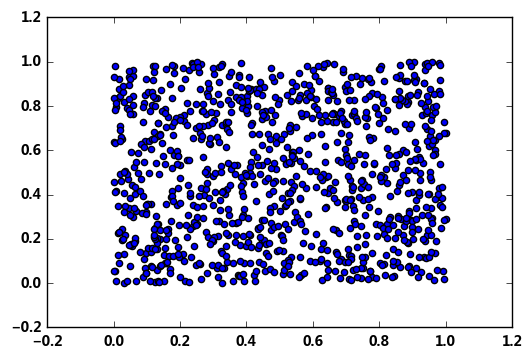

In [10]:
# numpy.random.rand(d0, d1, ..., dn)：生成一个[0,1)之间的随机浮点数或N维浮点数组 —— 均匀分布

a = np.random.rand()
print(a,type(a))  # 生成一个随机浮点数

b = np.random.rand(4)
print(b,type(b))  # 生成形状为4的一维数组

c = np.random.rand(2,3)
print(c,type(c))  # 生成形状为2*3的二维数组，注意这里不是((2,3))

samples1 = np.random.rand(1000)
samples2 = np.random.rand(1000)
plt.scatter(samples1,samples2)
plt.show()
# 生成1000个均匀分布的样本值

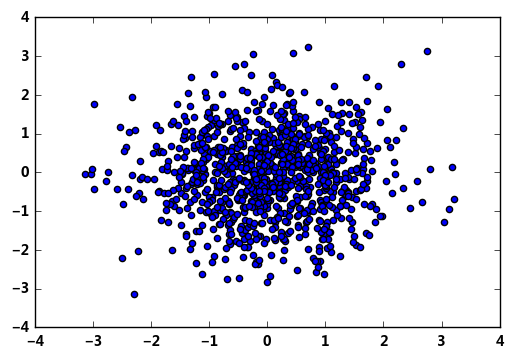

In [11]:
#  numpy.random.randn(d0, d1, ..., dn)：生成一个浮点数或N维浮点数组 —— 正态分布

samples1 = np.random.randn(1000)
samples2 = np.random.randn(1000)
plt.scatter(samples1,samples2)
plt.show()
# randn和rand的参数用法一样
# 生成1000个正太的样本值

5、对于图片的解析

width: 1080 pixels
height: 1440 pixels
channels: 3 pixels


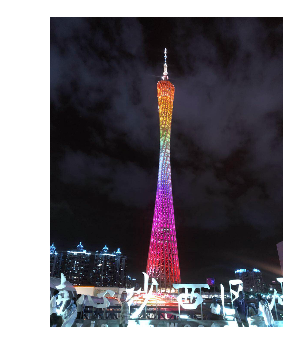

In [12]:
import cv2
image = cv2.imread('C:/Users/iHJX_Alienware/Desktop/image.jpg')
print("width: %d pixels" % (image.shape[1]))
print("height: %d pixels" % (image.shape[0]))
print("channels: %d pixels" % (image.shape[2]))
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
image[0]

array([[29, 32, 46],
       [30, 33, 47],
       [30, 33, 47],
       ...,
       [17, 11, 12],
       [16, 10, 11],
       [14,  8,  9]], dtype=uint8)